In [9]:
import random as rd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
# spikeinterface
import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.curation as scur
import spikeinterface.widgets as sw
from spikeinterface.exporters import export_to_phy
import probeinterface as pi
from probeinterface.plotting import plot_probe
from spikeinterface import concatenate_recordings, append_recordings

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', figsize=(8.0, 7.0))     # figsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def clear_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [2]:
import os

# Define o diretório temporário para o Windows
os.environ['TEMP'] = r'D:\Temp'
os.environ['TEMPDIR'] = r'D:\Temp'

In [3]:
print(si.__version__)

0.99.1


In [3]:
import os

os.environ["TMPDIR"] = r"C:\Users\Medicina\Temp"
os.environ["TEMP"] = r"C:\Users\Medicina\Temp"
os.environ["TMP"] = r"C:\Users\Medicina\Temp"

In [ ]:
# paths_rec=[r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A0\119A0_2024-08-05_11-58-30\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A0\119A0_2024-08-05_11-58-30\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A0\119A0_2024-08-05_11-58-30\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A0\119A0_2024-08-05_11-58-30\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A0\119A0_2024-08-05_11-58-30\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A0\119A0_2024-08-05_11-58-30\Record Node 107\experiment1\recording6\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A0\119A0_2024-08-05_11-58-30\Record Node 107\experiment1\recording7\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A0\119A0_2024-08-05_11-58-30\Record Node 107\experiment1\recording8\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"]

In [6]:
samp_freq = 30000
numchan = 64
dtype = 'int16'
gain = 0.195
offset = 32768 * 0.195 

output_file = r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A0\concatenated.dat"
os.makedirs(os.path.dirname(output_file), exist_ok=True)
def concatenate_files(file_paths, output_file):
    with open(output_file, 'wb') as f_out:
        for file_path in file_paths:
            with open(file_path, 'rb') as f_in:
                while chunk := f_in.read(1024 * 1024): 
                    f_out.write(chunk)
    print(f"Arquivos concatenados em: {output_file}")


concatenate_files(paths_rec, output_file)

Arquivos concatenados em: D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A0\concatenated.dat


# Extract and pre-process the data
The raw data file is imported. While importing values are converted to uV by subtracting offset and multiplying the gain. 

$$ micro _{volt} = (data - offset) * gain $$

Next the recording extractor is passed to a sub-recording extractor to select only data points after the "first frame" (refer to orignial pre-proc....mat file). This guarantees perfect alignment between ephys and video tracking data.

This method produces exactely the same results as the original matlab one. YOU CONFIRMED THIS! 

After importing, the data is filtered and re-referenced (e.g. CAR), stored in cache and the relevant data stored in a .pkl file for later use. See documentation for methods.

In [7]:

rec = si.read_binary(output_file, 
                     sampling_frequency=samp_freq, 
                     num_chan=numchan,
                     dtype=dtype,
                     time_axis=0,
                     gain_to_uV=gain,
                     offset_to_uV=offset)
# short recording for tests
rec = rec.frame_slice(start_frame=0, end_frame=samp_freq*600) # samp_freq*3600       # to sun on shorter segment

## quality checks
#print('recording duration = ',rec.get_num_samples()/samp_freq)
#plt = sw.plot_timeseries(rec, time_range=[10,12]) #channel_ids=[0]
##plt.ax.set_xlim([0,2])

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\binaryrecordingextractor.py:77: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")


WT D0

In [8]:
# paths_rec=[r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\D0\119D0_2024-10-16_13-29-54\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\D0\119D0_2024-10-16_13-29-54\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\D0\119D0_2024-10-16_13-29-54\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\D0\119D0_2024-10-16_13-29-54\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\D0\119D0_2024-10-16_13-29-54\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\D0\119D0_2024-10-16_13-29-54\Record Node 107\experiment1\recording6\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"]

WT D1

In [9]:
# paths_rec=[r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\D1\119D1_2024-10-17_12-30-05\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\D1\119D1_2024-10-17_12-30-05\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\D1\119D1_2024-10-17_12-30-05\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\D1\119D1_2024-10-17_12-30-05\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\D1\119D1_2024-10-17_12-30-05\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"]

KO C0

In [10]:
# paths_rec=[r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\C0\119C0_2024-10-11_12-54-00\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\C0\119C0_2024-10-11_12-54-00\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\C0\119C0_2024-10-11_12-54-00\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\C0\119C0_2024-10-11_12-54-00\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\C0\119C0_2024-10-11_12-54-00\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\C0\119C0_2024-10-11_12-54-00\Record Node 107\experiment1\recording6\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\C0\119C0_2024-10-11_12-54-00\Record Node 107\experiment1\recording7\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"]

K0 C1

In [11]:
# paths_rec=[r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\C1\119C1_2024-10-14_13-12-51\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\C1\119C1_2024-10-14_13-12-51\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\C1\119C1_2024-10-14_13-12-51\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\C1\119C1_2024-10-14_13-12-51\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\C1\119C1_2024-10-14_13-12-51\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\C1\119C1_2024-10-14_13-12-51\Record Node 107\experiment1\recording6\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"C:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\C1\119C1_2024-10-14_13-12-51\Record Node 107\experiment1\recording7\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"]

In [12]:
# Handle probe information
# define channel ids according to RHD map. You confirmed this by hand!
# map was done with the indices of the probeinterface object and the RHD channels were mapped
# to the correct physical locations on the probe.

# get probe info. on 18/03/22 the probeinterface object for ASSY-37-Fb was wrong. You corrected below
manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-37-Fb'
probe1 = pi.get_probe(manufacturer, probe_name)

#  Match to device (RHD headstage) map. It is the number on the INTAN board when taking into consideration orientation of mouting to the adapter.
# In this case it was corrected because probeinterface was wrong.
device_channel_indices_1 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]

# set channel ids based on probe map from cambridge site and RHD map.
probe1.set_device_channel_indices(device_channel_indices_1)

### set info for PROBE_2 ###
probe2 = pi.get_probe(manufacturer, probe_name)
# Match to device (RHD headstage) map. In this case it was corrected because probeinterface was wrong.
# for second probe with neuronexus adapter
# device_channel_indices_2 = [29,19,18,28,17,20,30,21,16,22,31,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,14,13,15,1,0]
# for 2x cambridge adapters
device_channel_indices_2 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]

# add 32 to account for second probe indices
device_channel_indices_2_64 = [element + 32 for element in device_channel_indices_2]
# set channel ids based on probe map from cambridge site and RHD map.
probe2.set_device_channel_indices(device_channel_indices_2_64)
# move probe to avoid overlap
probe2.move([700, 0])

# set contact ids
contact_ids_2 = np.arange(33, 65, 1)
# set contact ids to account for second probe
probe2.set_contact_ids(contact_ids_2)

# create and populate probegroup
probegroup = pi.ProbeGroup()
probegroup.add_probe(probe1)
probegroup.add_probe(probe2)

# set recording channels to new probe>RHD map.
# by shank to perform sorting by shank
rec_probe = rec.set_probegroup(probegroup, 
                               group_mode='by_shank')

# quality checks
# probe.to_dataframe(complete=True)
# plot_probe(probe1, with_device_index=True)
# pi.plotting.plot_probe_group(probegroup)

In [13]:
rec_probe

FrameSliceRecording: 64 channels - 30.0kHz - 1 segments - 18,000,000 samples 
                     600.00s (10.00 minutes) - int16 dtype - 2.15 GiB

In [14]:
print(rec_probe.get_property('group'))

[2 2 2 2 2 2 2 1 1 2 1 1 1 2 2 2 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 5 5 5 5 5
 5 5 4 4 5 4 4 4 5 5 5 3 3 3 3 3 3 4 3 3 4 4 4 4 4 3 3]


findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


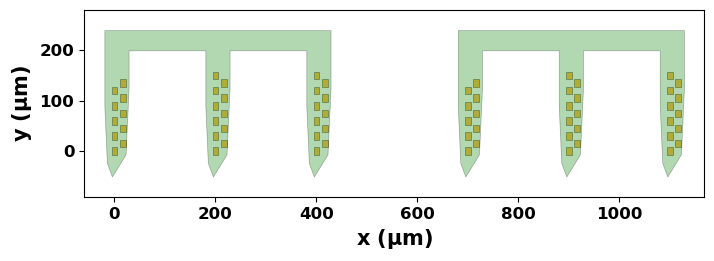

In [15]:
pi.plotting.plot_probe_group(probegroup)

In [16]:
# import pandas as pd
# canais_df_probe1 = probe1.to_dataframe()
# canais_df_probe2 = probe2.to_dataframe()
# # print(canais_df)
# # print(canais_df_probe2)
# canais_df_ordenado1 = canais_df_probe1.sort_values(by=['x', 'y']).reset_index(drop=True)
# canais_df_ordenado2 = canais_df_probe2.sort_values(by=['x', 'y']).reset_index(drop=True)
# # print('Probe 1')
# # print(canais_df_ordenado1)
# # print('Probe 2')
# # print(canais_df_ordenado1)

# canais_df_probe = probegroup.to_dataframe()
# canais_df_ordenado = canais_df_probe.sort_values(by=['x', 'y']).reset_index(drop=True)

# pd.set_option('display.max_rows', None)
# print('Probe Group')
# print(canais_df_ordenado)

In [17]:
print(len([19, 18, 30, 20, 17, 21, 31, 16, 23, 24, 61, 51, 50, 60, 62, 52, 49, 53, 63, 54, 48, 55, 59, 58, 57, 56, 39, 38, 37, 36, 40, 42, 41, 35, 43, 34, 44, 33, 45, 32, 46, 47]))

42


In [18]:
# Lista de canais removidos do PFC
bad_channels = [51, 50, 62, 52, 49, 53, 63, 48, 55, 56, 38, 37, 36, 41, 35, 34, 33, 45, 32, 46, 47]

# Remover os canais ruins
rec_probe = rec_probe.remove_channels(bad_channels)

print("Propriedades disponíveis:", rec_probe.get_property_keys())
print("Propriedade 'group' após remoção:", rec_probe.get_property('group'))


Propriedades disponíveis: ['gain_to_uV', 'offset_to_uV', 'contact_vector', 'location', 'group']
Propriedade 'group' após remoção: [2 2 2 2 2 2 2 1 1 2 1 1 1 2 2 2 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 4 4 4 4 4
 4 4 4 4 4 4]


In [19]:
rec_probe

ChannelSliceRecording: 43 channels - 30.0kHz - 1 segments - 18,000,000 samples 
                       600.00s (10.00 minutes) - int16 dtype - 1.44 GiB

In [20]:
# groups=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4 ,4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
# # groups=[ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4 ,4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
# rec_probe.set_channel_groups(groups)
# print(rec_probe.get_property('group'))
# # rec_probe = rec.set_probegroup(probegroup, group_mode='by_shank')

In [21]:
# propriedades_canais = rec_probe.get_property_keys()

# print("Propriedades dos canais restantes:")
# for canal_id in rec_probe.channel_ids:  # `channel_ids` contém apenas os canais restantes
#     print(f"\nCanal {canal_id}:")
#     for propriedade in propriedades_canais:
#         # Obter o valor completo da propriedade
#         valores_propriedade = rec_probe.get_property(propriedade)
        
#         # Usar numpy.where() para encontrar o índice do canal no array
#         indice_canal = np.where(rec_probe.channel_ids == canal_id)[0][0]
        
#         # Acessar o valor específico do canal_id atual
#         valor = valores_propriedade[indice_canal]
#         print(f"  {propriedade}: {valor}")


In [22]:
pd.set_option('display.max_rows', None)
probegroup.to_dataframe()

,probe_index,x,y,contact_shapes,width,height,shank_ids,contact_ids
0,0,200.0,60.0,rect,11.0,15.0,1,1
1,0,0.0,0.0,rect,11.0,15.0,0,2
2,0,16.5,15.0,rect,11.0,15.0,0,3
3,0,200.0,90.0,rect,11.0,15.0,1,4
4,0,16.5,135.0,rect,11.0,15.0,0,5
5,0,0.0,120.0,rect,11.0,15.0,0,6
6,0,16.5,45.0,rect,11.0,15.0,0,7
7,0,0.0,90.0,rect,11.0,15.0,0,8
8,0,16.5,105.0,rect,11.0,15.0,0,9
9,0,200.0,30.0,rect,11.0,15.0,1,10


### Bandpass filter and re-reference

In [23]:
rec_f = spre.bandpass_filter(rec_probe,
                           freq_min=300,
                           freq_max=6000,
                           ftype='butter')
#w = sw.plot_timeseries(rec_f, time_range=[3,8], show_channel_ids=True)

rec_cmr = spre.common_reference(rec_f,        #aqui vai remover o que está em comum nos canais se tiver ruido vai ter em todos e vai tira-lo (faz a media e tira a)
                              reference='global',
                              operator='median')
#w = sw.plot_timeseries(rec_cmr, time_range=[3,8])
#rec_cmr.annotate(is_filtered=True)

### Save data and extractor information

In [24]:
# chache data for later use
# this computes and saves the recording after applying the preprocessing chain
# used to make accessing data faster afterwards.
rec_cashed = rec_cmr.save(format='binary',
                          folder=r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A0\preprocessed",
                          n_jobs=2,
                          chunk_duration=30.0, # in seconds
                          progress_bar=True,
                          overwrite=True)

write_binary_recording with n_jobs = 2 and chunk_size = 900000


write_binary_recording:   0%|          | 0/20 [00:00<?, ?it/s]

In [10]:
import os
import tempfile

forced_temp_dir = r'D:\Temp'
os.makedirs(forced_temp_dir, exist_ok=True)

# Configura as variáveis de ambiente
tempfile.tempdir = forced_temp_dir
os.environ['TEMP'] = forced_temp_dir
os.environ['TMP'] = forced_temp_dir
os.environ['TMPDIR'] = forced_temp_dir
tempfile.tempdir = forced_temp_dir


### Run mountainsort
Run sorter by shank.

In [34]:


t_start = time.time()
# get dafault params for ms4
default_ms4_params = ss.get_default_sorter_params('mountainsort4')
# set params
default_ms4_params['detect_threshold'] = 4
default_ms4_params['detect_sign'] = -1
default_ms4_params['filter'] = False
default_ms4_params['whiten'] = True



#run sorter

sorted_ms4 = ss.run_sorter_by_property(sorter_name = 'mountainsort4',
                                       recording = rec_cashed,
                                       working_folder= r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A0\ms4_output",  # 'sort_'+str(session)
                                       grouping_property= 'group',
                                       verbose = False,
                                       **default_ms4_params)

# sorted_ms4 = ss.run_mountainsort4(recording = rec_cashed,
#                                  output_folder = r'D:\Dissertacao\Set 119 - IP3R2KO\WT\A0\119A0_2024-08-05_11-58-30\Record Node 107\experiment1\recording6\continuous\Acquisition_Board-106.Rhythm Data\ms4_output',  # 'sort_'+str(session)
#                                  verbose = False,
#                                  **default_ms4_params)

print('Elapsed time: ', time.time()-t_start)
print('Total: '+str(len(sorted_ms4.get_unit_ids()))+' units.')
#play sound when done
import os
os.system('say "sorting has finished"')

Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording


SpikeSortingError: Spike sorting error trace:
Traceback (most recent call last):
  File "c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\sorters\basesorter.py", line 254, in run_from_folder
    SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)
  File "c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\sorters\external\mountainsort4.py", line 136, in _run_from_folder
    old_api_sorting = mountainsort4.mountainsort4(**ms4_params)
  File "c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\mountainsort4\mountainsort4.py", line 34, in mountainsort4
    tempdir = tempfile.mkdtemp(dir=os.environ.get('TEMPDIR', '/tmp'))
  File "c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\tempfile.py", line 368, in mkdtemp
    _os.mkdir(file, 0o700)
FileNotFoundError: [WinError 3] O sistema não conseguiu localizar o caminho especificado: '/tmp\\tmpxqn3y_gi'

Spike sorting failed. You can inspect the runtime trace in D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A0\ms4_output\0/spikeinterface_log.json.

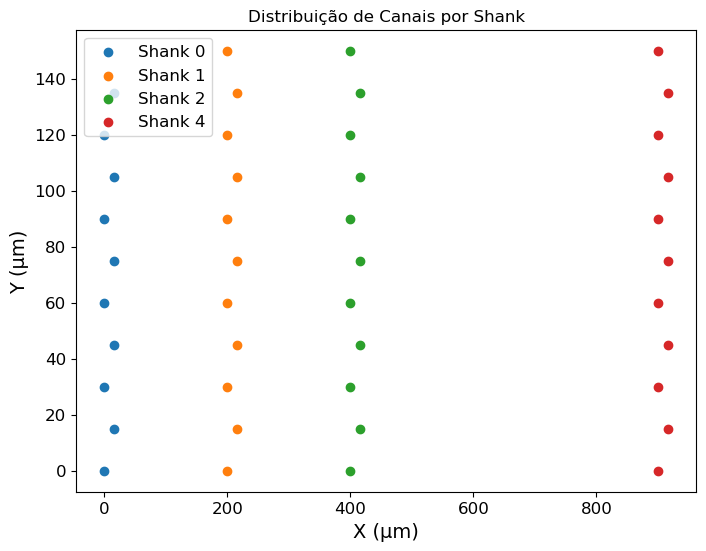

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

shank_ids = rec_cashed.get_property('group')
locations = np.array(rec_cashed.get_property('location'))

plt.figure(figsize=(8, 6))
for shank in np.unique(shank_ids):
    loc_shank = locations[shank_ids == shank]
    plt.scatter(loc_shank[:, 0], loc_shank[:, 1], label=f"Shank {shank}")
plt.xlabel("X (μm)")
plt.ylabel("Y (μm)")
plt.title("Distribuição de Canais por Shank")
plt.legend()
plt.show()


In [ ]:
x = sorted_ms4.get_property('group')
print(x)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4
 4 4 4 4 4 4]


In [ ]:
############# load previously processed data ############ 
#rec_test = si.load_extractor('preprocessed')
#
#rec_cashed = rec_test.set_probegroup(probegroup, 
#                               group_mode='by_shank')
#
##params= dict 
##params['sampling_frequency'] = 30000
#sorted_ms4 = se.read_mda_sorting('ms4_output', sampling_frequency = 30000)

### Extract waveforms

In [ ]:
# instantiate waveform extractor object
waveforms_ms4 = si.WaveformExtractor.create(rec_cashed, 
                                            sorted_ms4,
                                            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A0\waveforms", 
                                            remove_if_exists = True)

sparsity = si.compute_sparsity(waveforms_ms4, method="by_property", by_property='group')

# set params
waveforms_ms4.set_params(ms_before = 2, 
                         ms_after = 2, 
                         max_spikes_per_unit = 500,
                         return_scaled = True)

# run  extractor to get waveforms
waveforms_ms4.run_extract_waveforms(n_jobs = 2, 
                                    chunk_size = 30000)




extract waveforms memmap multi buffer:   0%|          | 0/600 [00:00<?, ?it/s]

In [ ]:
print(dir(si))

['AnalyzerExtension', 'AppendSegmentRecording', 'AppendSegmentSorting', 'BaseEvent', 'BaseEventSegment', 'BaseRecording', 'BaseRecordingSegment', 'BaseRecordingSnippets', 'BaseSnippets', 'BaseSnippetsSegment', 'BaseSorting', 'BaseSortingSegment', 'BinaryFolderRecording', 'BinaryRecordingExtractor', 'ChannelSliceRecording', 'ChannelSliceSnippets', 'ChannelSparsity', 'ChannelsAggregationRecording', 'ChunkRecordingExecutor', 'ComputeNoiseLevels', 'ComputeRandomSpikes', 'ComputeTemplates', 'ComputeWaveforms', 'ConcatenateSegmentRecording', 'ConcatenateSegmentSorting', 'DEV_MODE', 'FrameSliceRecording', 'FrameSliceSorting', 'InjectTemplatesRecording', 'NoiseGeneratorRecording', 'NpyFolderSnippets', 'NpySnippetsExtractor', 'NpzFolderSorting', 'NpzSortingExtractor', 'NumpyEvent', 'NumpyFolderSorting', 'NumpyRecording', 'NumpySnippets', 'NumpySorting', 'SelectSegmentRecording', 'SelectSegmentSorting', 'SharedMemoryRecording', 'SharedMemorySorting', 'SortingAnalyzer', 'SpikeVectorSortingSegment

### Export to phy

In [ ]:
# export spike to phy
export_to_phy(waveforms_ms4, 
              r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A0\phy_ms4",
              compute_pc_features = True, 
              compute_amplitudes = True,
              remove_if_exists=True,
              progress_bar = True,
              sparsity=sparsity)

write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

c:\Users\patri\miniconda3\envs\si_env\lib\site-packages\spikeinterface\core\core_tools.py:312: ResourceWarning: unclosed file <_io.TextIOWrapper name='D:\\Dissertacao\\Set119 - IP3R2KO\\WT\\A0\\phy_ms4\\recording.dat' mode='r+' encoding='UTF-8'>
  executor.run()


extract amplitudes:   0%|          | 0/600 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/44 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/44 [00:00<?, ?it/s]

extract PCs:   0%|          | 0/600 [00:00<?, ?it/s]

Run:
phy template-gui  D:\Dissertacao\Set119 - IP3R2KO\WT\A0\phy_ms4\params.py


In [ ]:
## open phy to manually curate data
# !phy template-gui  D:\Dissertacao\Set119 - IP3R2KO\WT\A0\119A0_2024-08-05_11-58-30\Record Node 107\experiment1\recording6\continuous\Acquisition_Board-106.Rhythm Data\phy_ms4\params.py

Usage: phy [OPTIONS] COMMAND [ARGS]...

Error: No such command 'template-gui'.


In [ ]:
# paths_rec=[r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A1\119A1_2024-08-06_13-34-13\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A1\119A1_2024-08-06_13-34-13\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A1\119A1_2024-08-06_13-34-13\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A1\119A1_2024-08-06_13-34-13\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A1\119A1_2024-08-06_13-34-13\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\WT\A1\119A1_2024-08-06_13-34-13\Record Node 107\experiment1\recording6\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"]

In [6]:
paths_rec=[
    r"E:\Set 115 - FOXO1-\KO\C2\115C2_2024-11-05_12-31-13\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\C2\115C2_2024-11-05_12-31-13\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\C2\115C2_2024-11-05_12-31-13\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\C2\115C2_2024-11-05_12-31-13\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\C2\115C2_2024-11-05_12-31-13\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\C2\115C2_2024-11-05_12-31-13\Record Node 107\experiment1\recording6\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"
]

In [6]:
import os

In [7]:
samp_freq = 30000
numchan = 64
dtype = 'int16'
gain = 0.195
offset = 32768 * 0.195 

output_file = r"E:\Set 115 - FOXO1-\KO\C2\concatenated.dat"
os.makedirs(os.path.dirname(output_file), exist_ok=True)
def concatenate_files(file_paths, output_file):
    with open(output_file, 'wb') as f_out:
        for file_path in file_paths:
            with open(file_path, 'rb') as f_in:
                while chunk := f_in.read(1024 * 1024): 
                    f_out.write(chunk)
    print(f"Arquivos concatenados em: {output_file}")


concatenate_files(paths_rec, output_file)

rec = si.read_binary(output_file, 
                     sampling_frequency=samp_freq, 
                     num_chan=numchan,
                     dtype=dtype,
                     time_axis=0,
                     gain_to_uV=gain,
                     offset_to_uV=offset)
# short recording for tests
# rec = rec.frame_slice(start_frame=0, end_frame=samp_freq*600)


manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-37-Fb'
probe1 = pi.get_probe(manufacturer, probe_name)
device_channel_indices_1 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]


probe1.set_device_channel_indices(device_channel_indices_1)
probe2 = pi.get_probe(manufacturer, probe_name)

device_channel_indices_2 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]

device_channel_indices_2_64 = [element + 32 for element in device_channel_indices_2]
# set channel ids based on probe map from cambridge site and RHD map.
probe2.set_device_channel_indices(device_channel_indices_2_64)
# move probe to avoid overlap
probe2.move([700, 0])

# set contact ids
contact_ids_2 = np.arange(33, 65, 1)
probe2.set_contact_ids(contact_ids_2)
probegroup = pi.ProbeGroup()
probegroup.add_probe(probe1)
probegroup.add_probe(probe2)

rec_probe = rec.set_probegroup(probegroup, 
                               group_mode='by_shank')

# bad_channels = [51, 50, 62, 52, 49, 53, 63, 48, 55, 56, 38, 37, 36, 41, 35, 34, 33, 45, 32, 46, 47]

# rec_probe = rec_probe.remove_channels(bad_channels)

rec_f = spre.bandpass_filter(rec_probe,
                           freq_min=300,
                           freq_max=6000,
                           ftype='butter')


rec_cmr = spre.common_reference(rec_f,        #aqui vai remover o que está em comum nos canais se tiver ruido vai ter em todos e vai tira-lo (faz a media e tira a)
                              reference='global',
                              operator='median')
rec_cashed = rec_cmr.save(format='binary',
                          folder=r"E:\Set 115 - FOXO1-\KO\C2\preprocessed",
                          n_jobs=2,
                          chunk_duration=30.0, # in seconds
                          progress_bar=True,
                          overwrite=True)

t_start = time.time()
# get dafault params for ms4
default_ms4_params = ss.get_default_sorter_params('mountainsort4')
# set params
default_ms4_params['detect_threshold'] = 4
default_ms4_params['detect_sign'] = -1
default_ms4_params['filter'] = False
default_ms4_params['whiten'] = True

sorted_ms4 = ss.run_sorter_by_property(sorter_name = 'mountainsort4',
                                       recording = rec_cashed,
                                       working_folder= r"E:\Set 115 - FOXO1-\KO\C2\ms4_output",  # 'sort_'+str(session)
                                       grouping_property= 'group',
                                       verbose = False,
                                       **default_ms4_params)

print('Elapsed time: ', time.time()-t_start)
print('Total: '+str(len(sorted_ms4.get_unit_ids()))+' units.')
#play sound when done
import os
os.system('say "sorting has finished"')
waveforms_ms4 = si.WaveformExtractor.create(rec_cashed, 
                                            sorted_ms4,
                                            r"E:\Set 115 - FOXO1-\KO\C2\waveforms", 
                                            remove_if_exists = True)

sparsity = si.compute_sparsity(waveforms_ms4, method="by_property", by_property='group')


waveforms_ms4.set_params(ms_before = 2, 
                         ms_after = 2, 
                         max_spikes_per_unit = 500,
                         return_scaled = True)


waveforms_ms4.run_extract_waveforms(n_jobs = 2, 
                                    chunk_size = 30000)
export_to_phy(waveforms_ms4, 
              r"E:\Set 115 - FOXO1-\KO\C2\phy_ms4",
              compute_pc_features = True, 
              compute_amplitudes = True,
              remove_if_exists=True,
              progress_bar = True,
              sparsity=sparsity)


Arquivos concatenados em: E:\Set 115 - FOXO1-\KO\C2\concatenated.dat


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\binaryrecordingextractor.py:77: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")


write_binary_recording with n_jobs = 2 and chunk_size = 900000


write_binary_recording:   0%|          | 0/164 [00:00<?, ?it/s]

Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\sorters\basesorter.py:254: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\C2\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Elapsed time:  4576.331774234772
Total: 192 units.


extract waveforms memmap multi buffer:   0%|          | 0/4891 [00:00<?, ?it/s]

write_binary_recording:   0%|          | 0/4891 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\core_tools.py:312: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\C2\\phy_ms4\\recording.dat' mode='r+' encoding='UTF-8'>
  executor.run()


extract amplitudes:   0%|          | 0/4891 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/192 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/192 [00:00<?, ?it/s]

extract PCs:   0%|          | 0/4891 [00:00<?, ?it/s]

Run:
phy template-gui  E:\Set 115 - FOXO1-\KO\C2\phy_ms4\params.py


In [ ]:
# paths_rec=[r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\B0\119B0_2024-08-07_13-06-21\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\B0\119B0_2024-08-07_13-06-21\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\B0\119B0_2024-08-07_13-06-21\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\B0\119B0_2024-08-07_13-06-21\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\B0\119B0_2024-08-07_13-06-21\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\B0\119B0_2024-08-07_13-06-21\Record Node 107\experiment1\recording6\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\B0\119B0_2024-08-07_13-06-21\Record Node 107\experiment1\recording7\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"]

In [8]:
paths_rec=[
    r"E:\Set 115 - FOXO1-\KO\C3\115C3_2024-11-06_12-07-56\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\C3\115C3_2024-11-06_12-07-56\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\C3\115C3_2024-11-06_12-07-56\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\C3\115C3_2024-11-06_12-07-56\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\C3\115C3_2024-11-06_12-07-56\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"
]

In [9]:
samp_freq = 30000
numchan = 64
dtype = 'int16'
gain = 0.195
offset = 32768 * 0.195 

output_file = r"E:\Set 115 - FOXO1-\KO\C3\concatenated.dat"
os.makedirs(os.path.dirname(output_file), exist_ok=True)
def concatenate_files(file_paths, output_file):
    with open(output_file, 'wb') as f_out:
        for file_path in file_paths:
            with open(file_path, 'rb') as f_in:
                while chunk := f_in.read(1024 * 1024): 
                    f_out.write(chunk)
    print(f"Arquivos concatenados em: {output_file}")


concatenate_files(paths_rec, output_file)

rec = si.read_binary(output_file, 
                     sampling_frequency=samp_freq, 
                     num_chan=numchan,
                     dtype=dtype,
                     time_axis=0,
                     gain_to_uV=gain,
                     offset_to_uV=offset)
# short recording for tests
# rec = rec.frame_slice(start_frame=0, end_frame=samp_freq*600)


manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-37-Fb'
probe1 = pi.get_probe(manufacturer, probe_name)
device_channel_indices_1 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]


probe1.set_device_channel_indices(device_channel_indices_1)
probe2 = pi.get_probe(manufacturer, probe_name)

device_channel_indices_2 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]

device_channel_indices_2_64 = [element + 32 for element in device_channel_indices_2]
# set channel ids based on probe map from cambridge site and RHD map.
probe2.set_device_channel_indices(device_channel_indices_2_64)
# move probe to avoid overlap
probe2.move([700, 0])

# set contact ids
contact_ids_2 = np.arange(33, 65, 1)
probe2.set_contact_ids(contact_ids_2)
probegroup = pi.ProbeGroup()
probegroup.add_probe(probe1)
probegroup.add_probe(probe2)

rec_probe = rec.set_probegroup(probegroup, 
                               group_mode='by_shank')

# bad_channels = [51, 50, 62, 52, 49, 53, 63, 48, 55, 56, 38, 37, 36, 41, 35, 34, 33, 45, 32, 46, 47]

# rec_probe = rec_probe.remove_channels(bad_channels)

rec_f = spre.bandpass_filter(rec_probe,
                           freq_min=300,
                           freq_max=6000,
                           ftype='butter')


rec_cmr = spre.common_reference(rec_f,        #aqui vai remover o que está em comum nos canais se tiver ruido vai ter em todos e vai tira-lo (faz a media e tira a)
                              reference='global',
                              operator='median')
rec_cashed = rec_cmr.save(format='binary',
                          folder=r"E:\Set 115 - FOXO1-\KO\C3\preprocessed",
                          n_jobs=2,
                          chunk_duration=30.0, # in seconds
                          progress_bar=True,
                          overwrite=True)

t_start = time.time()
# get dafault params for ms4
default_ms4_params = ss.get_default_sorter_params('mountainsort4')
# set params
default_ms4_params['detect_threshold'] = 4
default_ms4_params['detect_sign'] = -1
default_ms4_params['filter'] = False
default_ms4_params['whiten'] = True

sorted_ms4 = ss.run_sorter_by_property(sorter_name = 'mountainsort4',
                                       recording = rec_cashed,
                                       working_folder= r"E:\Set 115 - FOXO1-\KO\C3\ms4_output",  # 'sort_'+str(session)
                                       grouping_property= 'group',
                                       verbose = False,
                                       **default_ms4_params)

print('Elapsed time: ', time.time()-t_start)
print('Total: '+str(len(sorted_ms4.get_unit_ids()))+' units.')
#play sound when done
import os
os.system('say "sorting has finished"')
waveforms_ms4 = si.WaveformExtractor.create(rec_cashed, 
                                            sorted_ms4,
                                            r"E:\Set 115 - FOXO1-\KO\C3\waveforms", 
                                            remove_if_exists = True)

sparsity = si.compute_sparsity(waveforms_ms4, method="by_property", by_property='group')


waveforms_ms4.set_params(ms_before = 2, 
                         ms_after = 2, 
                         max_spikes_per_unit = 500,
                         return_scaled = True)


waveforms_ms4.run_extract_waveforms(n_jobs = 2, 
                                    chunk_size = 30000)
export_to_phy(waveforms_ms4, 
              r"E:\Set 115 - FOXO1-\KO\C3\phy_ms4",
              compute_pc_features = True, 
              compute_amplitudes = True,
              remove_if_exists=True,
              progress_bar = True,
              sparsity=sparsity)

Arquivos concatenados em: E:\Set 115 - FOXO1-\KO\C3\concatenated.dat


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\binaryrecordingextractor.py:77: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")
D:\Temp\ipykernel_10804\1062534745.py:20: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\C2\\concatenated.dat' mode='r' encoding='UTF-8'>
  rec = si.read_binary(output_file,


write_binary_recording with n_jobs = 2 and chunk_size = 900000


write_binary_recording:   0%|          | 0/151 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\baserecording.py:550: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\C3\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached.set_probegroup(probegroup)
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\base.py:864: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\C3\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached = self._save(folder=folder, verbose=verbose, **save_kwargs)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\sorters\basesorter.py:254: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\C3\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\copy.py:205: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\C2\\concatenated.dat' mode='r' encoding='UTF-8'>
  for a in x:


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Elapsed time:  4209.15953707695
Total: 79 units.


extract waveforms memmap multi buffer:   0%|          | 0/4501 [00:00<?, ?it/s]

write_binary_recording:   0%|          | 0/4501 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\core_tools.py:312: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\C3\\phy_ms4\\recording.dat' mode='r+' encoding='UTF-8'>
  executor.run()


extract amplitudes:   0%|          | 0/4501 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/79 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/79 [00:00<?, ?it/s]

extract PCs:   0%|          | 0/4501 [00:00<?, ?it/s]

Run:
phy template-gui  E:\Set 115 - FOXO1-\KO\C3\phy_ms4\params.py


In [ ]:
# paths_rec=[r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\B1\119B1_2024-08-09_13-33-01\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\B1\119B1_2024-08-09_13-33-01\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\B1\119B1_2024-08-09_13-33-01\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\B1\119B1_2024-08-09_13-33-01\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\B1\119B1_2024-08-09_13-33-01\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
#            r"D:\Astrogang Ephys_Patricia\Recordings\Set 119 - IP3R2KO\KO\B1\119B1_2024-08-09_13-33-01\Record Node 107\experiment1\recording6\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"]

In [10]:
paths_rec=[
    r"E:\Set 115 - FOXO1-\WT\C1\115C1_2024-11-04_12-25-38\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\C1\115C1_2024-11-04_12-25-38\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\C1\115C1_2024-11-04_12-25-38\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\C1\115C1_2024-11-04_12-25-38\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\C1\115C1_2024-11-04_12-25-38\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\C1\115C1_2024-11-04_12-25-38\Record Node 107\experiment1\recording6\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"
]

In [11]:
samp_freq = 30000
numchan = 64
dtype = 'int16'
gain = 0.195
offset = 32768 * 0.195 

output_file = r"E:\Set 115 - FOXO1-\WT\C1\concatenated.dat"
os.makedirs(os.path.dirname(output_file), exist_ok=True)
def concatenate_files(file_paths, output_file):
    with open(output_file, 'wb') as f_out:
        for file_path in file_paths:
            with open(file_path, 'rb') as f_in:
                while chunk := f_in.read(1024 * 1024): 
                    f_out.write(chunk)
    print(f"Arquivos concatenados em: {output_file}")


concatenate_files(paths_rec, output_file)

rec = si.read_binary(output_file, 
                     sampling_frequency=samp_freq, 
                     num_chan=numchan,
                     dtype=dtype,
                     time_axis=0,
                     gain_to_uV=gain,
                     offset_to_uV=offset)
# short recording for tests
# rec = rec.frame_slice(start_frame=0, end_frame=samp_freq*600)


manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-37-Fb'
probe1 = pi.get_probe(manufacturer, probe_name)
device_channel_indices_1 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]


probe1.set_device_channel_indices(device_channel_indices_1)
probe2 = pi.get_probe(manufacturer, probe_name)

device_channel_indices_2 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]

device_channel_indices_2_64 = [element + 32 for element in device_channel_indices_2]
# set channel ids based on probe map from cambridge site and RHD map.
probe2.set_device_channel_indices(device_channel_indices_2_64)
# move probe to avoid overlap
probe2.move([700, 0])

# set contact ids
contact_ids_2 = np.arange(33, 65, 1)
probe2.set_contact_ids(contact_ids_2)
probegroup = pi.ProbeGroup()
probegroup.add_probe(probe1)
probegroup.add_probe(probe2)

rec_probe = rec.set_probegroup(probegroup, 
                               group_mode='by_shank')

# bad_channels = [51, 50, 62, 52, 49, 53, 63, 48, 55, 56, 38, 37, 36, 41, 35, 34, 33, 45, 32, 46, 47]

# rec_probe = rec_probe.remove_channels(bad_channels)

rec_f = spre.bandpass_filter(rec_probe,
                           freq_min=300,
                           freq_max=6000,
                           ftype='butter')


rec_cmr = spre.common_reference(rec_f,        #aqui vai remover o que está em comum nos canais se tiver ruido vai ter em todos e vai tira-lo (faz a media e tira a)
                              reference='global',
                              operator='median')
rec_cashed = rec_cmr.save(format='binary',
                          folder=r"E:\Set 115 - FOXO1-\WT\C1\preprocessed",
                          n_jobs=2,
                          chunk_duration=30.0, # in seconds
                          progress_bar=True,
                          overwrite=True)

t_start = time.time()
# get dafault params for ms4
default_ms4_params = ss.get_default_sorter_params('mountainsort4')
# set params
default_ms4_params['detect_threshold'] = 4
default_ms4_params['detect_sign'] = -1
default_ms4_params['filter'] = False
default_ms4_params['whiten'] = True

sorted_ms4 = ss.run_sorter_by_property(sorter_name = 'mountainsort4',
                                       recording = rec_cashed,
                                       working_folder= r"E:\Set 115 - FOXO1-\WT\C1\ms4_output",  # 'sort_'+str(session)
                                       grouping_property= 'group',
                                       verbose = False,
                                       **default_ms4_params)

print('Elapsed time: ', time.time()-t_start)
print('Total: '+str(len(sorted_ms4.get_unit_ids()))+' units.')
#play sound when done
import os
os.system('say "sorting has finished"')
waveforms_ms4 = si.WaveformExtractor.create(rec_cashed, 
                                            sorted_ms4,
                                            r"E:\Set 115 - FOXO1-\WT\C1\waveforms", 
                                            remove_if_exists = True)

sparsity = si.compute_sparsity(waveforms_ms4, method="by_property", by_property='group')


waveforms_ms4.set_params(ms_before = 2, 
                         ms_after = 2, 
                         max_spikes_per_unit = 500,
                         return_scaled = True)


waveforms_ms4.run_extract_waveforms(n_jobs = 2, 
                                    chunk_size = 30000)
export_to_phy(waveforms_ms4, 
              r"E:\Set 115 - FOXO1-\WT\C1\phy_ms4",
              compute_pc_features = True, 
              compute_amplitudes = True,
              remove_if_exists=True,
              progress_bar = True,
              sparsity=sparsity)

Arquivos concatenados em: E:\Set 115 - FOXO1-\WT\C1\concatenated.dat


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\binaryrecordingextractor.py:77: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")
D:\Temp\ipykernel_10804\3774849426.py:20: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\C3\\concatenated.dat' mode='r' encoding='UTF-8'>
  rec = si.read_binary(output_file,


write_binary_recording with n_jobs = 2 and chunk_size = 900000


write_binary_recording:   0%|          | 0/175 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\baserecording.py:550: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\C1\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached.set_probegroup(probegroup)
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\base.py:864: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\C1\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached = self._save(folder=folder, verbose=verbose, **save_kwargs)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\sorters\basesorter.py:254: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\C1\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Elapsed time:  4738.816961765289
Total: 71 units.


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\concurrent\futures\process.py:142: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\C3\\concatenated.dat' mode='r' encoding='UTF-8'>
  self.future = future
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\concurrent\futures\process.py:142: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\C3\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  self.future = future
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\concurrent\futures\process.py:142: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\C2\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  self.future = future


extract waveforms memmap multi buffer:   0%|          | 0/5229 [00:00<?, ?it/s]

write_binary_recording:   0%|          | 0/5229 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\core_tools.py:312: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\C1\\phy_ms4\\recording.dat' mode='r+' encoding='UTF-8'>
  executor.run()


extract amplitudes:   0%|          | 0/5229 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/71 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/71 [00:00<?, ?it/s]

extract PCs:   0%|          | 0/5229 [00:00<?, ?it/s]

Run:
phy template-gui  E:\Set 115 - FOXO1-\WT\C1\phy_ms4\params.py


In [12]:
paths_rec=[
    r"E:\Set 115 - FOXO1-\WT\D0\115D0_2024-11-13_11-52-17\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\D0\115D0_2024-11-13_11-52-17\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\D0\115D0_2024-11-13_11-52-17\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\D0\115D0_2024-11-13_11-52-17\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\D0\115D0_2024-11-13_11-52-17\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"
]

In [13]:
samp_freq = 30000
numchan = 64
dtype = 'int16'
gain = 0.195
offset = 32768 * 0.195 

output_file = r"E:\Set 115 - FOXO1-\WT\D0\concatenated.dat"
os.makedirs(os.path.dirname(output_file), exist_ok=True)
def concatenate_files(file_paths, output_file):
    with open(output_file, 'wb') as f_out:
        for file_path in file_paths:
            with open(file_path, 'rb') as f_in:
                while chunk := f_in.read(1024 * 1024): 
                    f_out.write(chunk)
    print(f"Arquivos concatenados em: {output_file}")


concatenate_files(paths_rec, output_file)

rec = si.read_binary(output_file, 
                     sampling_frequency=samp_freq, 
                     num_chan=numchan,
                     dtype=dtype,
                     time_axis=0,
                     gain_to_uV=gain,
                     offset_to_uV=offset)
# short recording for tests
# rec = rec.frame_slice(start_frame=0, end_frame=samp_freq*600)


manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-37-Fb'
probe1 = pi.get_probe(manufacturer, probe_name)
device_channel_indices_1 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]


probe1.set_device_channel_indices(device_channel_indices_1)
probe2 = pi.get_probe(manufacturer, probe_name)

device_channel_indices_2 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]

device_channel_indices_2_64 = [element + 32 for element in device_channel_indices_2]
# set channel ids based on probe map from cambridge site and RHD map.
probe2.set_device_channel_indices(device_channel_indices_2_64)
# move probe to avoid overlap
probe2.move([700, 0])

# set contact ids
contact_ids_2 = np.arange(33, 65, 1)
probe2.set_contact_ids(contact_ids_2)
probegroup = pi.ProbeGroup()
probegroup.add_probe(probe1)
probegroup.add_probe(probe2)

rec_probe = rec.set_probegroup(probegroup, 
                               group_mode='by_shank')

# bad_channels = [51, 50, 62, 52, 49, 53, 63, 48, 55, 56, 38, 37, 36, 41, 35, 34, 33, 45, 32, 46, 47]

# rec_probe = rec_probe.remove_channels(bad_channels)

rec_f = spre.bandpass_filter(rec_probe,
                           freq_min=300,
                           freq_max=6000,
                           ftype='butter')


rec_cmr = spre.common_reference(rec_f,        #aqui vai remover o que está em comum nos canais se tiver ruido vai ter em todos e vai tira-lo (faz a media e tira a)
                              reference='global',
                              operator='median')
rec_cashed = rec_cmr.save(format='binary',
                          folder=r"E:\Set 115 - FOXO1-\WT\D0\preprocessed",
                          n_jobs=2,
                          chunk_duration=30.0, # in seconds
                          progress_bar=True,
                          overwrite=True)

t_start = time.time()
# get dafault params for ms4
default_ms4_params = ss.get_default_sorter_params('mountainsort4')
# set params
default_ms4_params['detect_threshold'] = 4
default_ms4_params['detect_sign'] = -1
default_ms4_params['filter'] = False
default_ms4_params['whiten'] = True

sorted_ms4 = ss.run_sorter_by_property(sorter_name = 'mountainsort4',
                                       recording = rec_cashed,
                                       working_folder= r"E:\Set 115 - FOXO1-\WT\D0\ms4_output",  # 'sort_'+str(session)
                                       grouping_property= 'group',
                                       verbose = False,
                                       **default_ms4_params)

print('Elapsed time: ', time.time()-t_start)
print('Total: '+str(len(sorted_ms4.get_unit_ids()))+' units.')
#play sound when done
import os
os.system('say "sorting has finished"')
waveforms_ms4 = si.WaveformExtractor.create(rec_cashed, 
                                            sorted_ms4,
                                            r"E:\Set 115 - FOXO1-\WT\D0\waveforms", 
                                            remove_if_exists = True)

sparsity = si.compute_sparsity(waveforms_ms4, method="by_property", by_property='group')


waveforms_ms4.set_params(ms_before = 2, 
                         ms_after = 2, 
                         max_spikes_per_unit = 500,
                         return_scaled = True)


waveforms_ms4.run_extract_waveforms(n_jobs = 2, 
                                    chunk_size = 30000)
export_to_phy(waveforms_ms4, 
              r"E:\Set 115 - FOXO1-\WT\D0\phy_ms4",
              compute_pc_features = True, 
              compute_amplitudes = True,
              remove_if_exists=True,
              progress_bar = True,
              sparsity=sparsity)

Arquivos concatenados em: E:\Set 115 - FOXO1-\WT\D0\concatenated.dat


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\binaryrecordingextractor.py:77: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")
D:\Temp\ipykernel_10804\4549822.py:20: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\C1\\concatenated.dat' mode='r' encoding='UTF-8'>
  rec = si.read_binary(output_file,


write_binary_recording with n_jobs = 2 and chunk_size = 900000


write_binary_recording:   0%|          | 0/151 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\baserecording.py:550: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\D0\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached.set_probegroup(probegroup)
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\base.py:864: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\D0\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached = self._save(folder=folder, verbose=verbose, **save_kwargs)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\sorters\basesorter.py:254: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\D0\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Elapsed time:  4187.260367631912
Total: 138 units.


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\concurrent\futures\_base.py:337: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\C1\\concatenated.dat' mode='r' encoding='UTF-8'>
  self._done_callbacks = []
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\concurrent\futures\_base.py:337: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\C1\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  self._done_callbacks = []


extract waveforms memmap multi buffer:   0%|          | 0/4501 [00:00<?, ?it/s]

write_binary_recording:   0%|          | 0/4501 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\core_tools.py:312: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\D0\\phy_ms4\\recording.dat' mode='r+' encoding='UTF-8'>
  executor.run()


extract amplitudes:   0%|          | 0/4501 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/138 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/138 [00:00<?, ?it/s]

extract PCs:   0%|          | 0/4501 [00:00<?, ?it/s]

Run:
phy template-gui  E:\Set 115 - FOXO1-\WT\D0\phy_ms4\params.py


In [14]:
paths_rec=[
    r"E:\Set 115 - FOXO1-\WT\D1\115D1_2024-11-14_12-05-02\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\D1\115D1_2024-11-14_12-05-02\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\D1\115D1_2024-11-14_12-05-02\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\D1\115D1_2024-11-14_12-05-02\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\D1\115D1_2024-11-14_12-05-02\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"
]

In [15]:
samp_freq = 30000
numchan = 64
dtype = 'int16'
gain = 0.195
offset = 32768 * 0.195 

output_file = r"E:\Set 115 - FOXO1-\WT\D1\concatenated.dat"
os.makedirs(os.path.dirname(output_file), exist_ok=True)
def concatenate_files(file_paths, output_file):
    with open(output_file, 'wb') as f_out:
        for file_path in file_paths:
            with open(file_path, 'rb') as f_in:
                while chunk := f_in.read(1024 * 1024): 
                    f_out.write(chunk)
    print(f"Arquivos concatenados em: {output_file}")


concatenate_files(paths_rec, output_file)

rec = si.read_binary(output_file, 
                     sampling_frequency=samp_freq, 
                     num_chan=numchan,
                     dtype=dtype,
                     time_axis=0,
                     gain_to_uV=gain,
                     offset_to_uV=offset)
# short recording for tests
# rec = rec.frame_slice(start_frame=0, end_frame=samp_freq*600)


manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-37-Fb'
probe1 = pi.get_probe(manufacturer, probe_name)
device_channel_indices_1 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]


probe1.set_device_channel_indices(device_channel_indices_1)
probe2 = pi.get_probe(manufacturer, probe_name)

device_channel_indices_2 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]

device_channel_indices_2_64 = [element + 32 for element in device_channel_indices_2]
# set channel ids based on probe map from cambridge site and RHD map.
probe2.set_device_channel_indices(device_channel_indices_2_64)
# move probe to avoid overlap
probe2.move([700, 0])

# set contact ids
contact_ids_2 = np.arange(33, 65, 1)
probe2.set_contact_ids(contact_ids_2)
probegroup = pi.ProbeGroup()
probegroup.add_probe(probe1)
probegroup.add_probe(probe2)

rec_probe = rec.set_probegroup(probegroup, 
                               group_mode='by_shank')

# bad_channels = [51, 50, 62, 52, 49, 53, 63, 48, 55, 56, 38, 37, 36, 41, 35, 34, 33, 45, 32, 46, 47]

# rec_probe = rec_probe.remove_channels(bad_channels)

rec_f = spre.bandpass_filter(rec_probe,
                           freq_min=300,
                           freq_max=6000,
                           ftype='butter')


rec_cmr = spre.common_reference(rec_f,        #aqui vai remover o que está em comum nos canais se tiver ruido vai ter em todos e vai tira-lo (faz a media e tira a)
                              reference='global',
                              operator='median')
rec_cashed = rec_cmr.save(format='binary',
                          folder=r"E:\Set 115 - FOXO1-\WT\D1\preprocessed",
                          n_jobs=2,
                          chunk_duration=30.0, # in seconds
                          progress_bar=True,
                          overwrite=True)

t_start = time.time()
# get dafault params for ms4
default_ms4_params = ss.get_default_sorter_params('mountainsort4')
# set params
default_ms4_params['detect_threshold'] = 4
default_ms4_params['detect_sign'] = -1
default_ms4_params['filter'] = False
default_ms4_params['whiten'] = True

sorted_ms4 = ss.run_sorter_by_property(sorter_name = 'mountainsort4',
                                       recording = rec_cashed,
                                       working_folder= r"E:\Set 115 - FOXO1-\WT\D1\ms4_output",  # 'sort_'+str(session)
                                       grouping_property= 'group',
                                       verbose = False,
                                       **default_ms4_params)

print('Elapsed time: ', time.time()-t_start)
print('Total: '+str(len(sorted_ms4.get_unit_ids()))+' units.')
#play sound when done
import os
os.system('say "sorting has finished"')
waveforms_ms4 = si.WaveformExtractor.create(rec_cashed, 
                                            sorted_ms4,
                                            r"E:\Set 115 - FOXO1-\WT\D1\waveforms", 
                                            remove_if_exists = True)

sparsity = si.compute_sparsity(waveforms_ms4, method="by_property", by_property='group')


waveforms_ms4.set_params(ms_before = 2, 
                         ms_after = 2, 
                         max_spikes_per_unit = 500,
                         return_scaled = True)


waveforms_ms4.run_extract_waveforms(n_jobs = 2, 
                                    chunk_size = 30000)
export_to_phy(waveforms_ms4, 
              r"E:\Set 115 - FOXO1-\WT\D1\phy_ms4",
              compute_pc_features = True, 
              compute_amplitudes = True,
              remove_if_exists=True,
              progress_bar = True,
              sparsity=sparsity)

Arquivos concatenados em: E:\Set 115 - FOXO1-\WT\D1\concatenated.dat


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\binaryrecordingextractor.py:77: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")
D:\Temp\ipykernel_10804\2054602465.py:20: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\D0\\concatenated.dat' mode='r' encoding='UTF-8'>
  rec = si.read_binary(output_file,


write_binary_recording with n_jobs = 2 and chunk_size = 900000


write_binary_recording:   0%|          | 0/126 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\baserecording.py:550: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\D1\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached.set_probegroup(probegroup)
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\base.py:864: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\D1\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached = self._save(folder=folder, verbose=verbose, **save_kwargs)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\sorters\basesorter.py:254: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\D1\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Elapsed time:  3507.561994075775
Total: 142 units.


extract waveforms memmap multi buffer:   0%|          | 0/3760 [00:00<?, ?it/s]

write_binary_recording:   0%|          | 0/3760 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\core_tools.py:312: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\D1\\phy_ms4\\recording.dat' mode='r+' encoding='UTF-8'>
  executor.run()


extract amplitudes:   0%|          | 0/3760 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/142 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/142 [00:00<?, ?it/s]

extract PCs:   0%|          | 0/3760 [00:00<?, ?it/s]

Run:
phy template-gui  E:\Set 115 - FOXO1-\WT\D1\phy_ms4\params.py


In [16]:
paths_rec=[
    r"E:\Set 115 - FOXO1-\WT\E0\115E0_2024-11-15_12-52-54\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\E0\115E0_2024-11-15_12-52-54\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\E0\115E0_2024-11-15_12-52-54\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\E0\115E0_2024-11-15_12-52-54\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\E0\115E0_2024-11-15_12-52-54\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\E0\115E0_2024-11-15_12-52-54\Record Node 107\experiment1\recording6\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"
]

In [17]:
samp_freq = 30000
numchan = 64
dtype = 'int16'
gain = 0.195
offset = 32768 * 0.195 

output_file = r"E:\Set 115 - FOXO1-\WT\E0\concatenated.dat"
os.makedirs(os.path.dirname(output_file), exist_ok=True)
def concatenate_files(file_paths, output_file):
    with open(output_file, 'wb') as f_out:
        for file_path in file_paths:
            with open(file_path, 'rb') as f_in:
                while chunk := f_in.read(1024 * 1024): 
                    f_out.write(chunk)
    print(f"Arquivos concatenados em: {output_file}")


concatenate_files(paths_rec, output_file)

rec = si.read_binary(output_file, 
                     sampling_frequency=samp_freq, 
                     num_chan=numchan,
                     dtype=dtype,
                     time_axis=0,
                     gain_to_uV=gain,
                     offset_to_uV=offset)
# short recording for tests
# rec = rec.frame_slice(start_frame=0, end_frame=samp_freq*600)


manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-37-Fb'
probe1 = pi.get_probe(manufacturer, probe_name)
device_channel_indices_1 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]


probe1.set_device_channel_indices(device_channel_indices_1)
probe2 = pi.get_probe(manufacturer, probe_name)

device_channel_indices_2 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]

device_channel_indices_2_64 = [element + 32 for element in device_channel_indices_2]
# set channel ids based on probe map from cambridge site and RHD map.
probe2.set_device_channel_indices(device_channel_indices_2_64)
# move probe to avoid overlap
probe2.move([700, 0])

# set contact ids
contact_ids_2 = np.arange(33, 65, 1)
probe2.set_contact_ids(contact_ids_2)
probegroup = pi.ProbeGroup()
probegroup.add_probe(probe1)
probegroup.add_probe(probe2)

rec_probe = rec.set_probegroup(probegroup, 
                               group_mode='by_shank')

# bad_channels = [51, 50, 62, 52, 49, 53, 63, 48, 55, 56, 38, 37, 36, 41, 35, 34, 33, 45, 32, 46, 47]

# rec_probe = rec_probe.remove_channels(bad_channels)

rec_f = spre.bandpass_filter(rec_probe,
                           freq_min=300,
                           freq_max=6000,
                           ftype='butter')


rec_cmr = spre.common_reference(rec_f,        #aqui vai remover o que está em comum nos canais se tiver ruido vai ter em todos e vai tira-lo (faz a media e tira a)
                              reference='global',
                              operator='median')
rec_cashed = rec_cmr.save(format='binary',
                          folder=r"E:\Set 115 - FOXO1-\WT\E0\preprocessed",
                          n_jobs=2,
                          chunk_duration=30.0, # in seconds
                          progress_bar=True,
                          overwrite=True)

t_start = time.time()
# get dafault params for ms4
default_ms4_params = ss.get_default_sorter_params('mountainsort4')
# set params
default_ms4_params['detect_threshold'] = 4
default_ms4_params['detect_sign'] = -1
default_ms4_params['filter'] = False
default_ms4_params['whiten'] = True

sorted_ms4 = ss.run_sorter_by_property(sorter_name = 'mountainsort4',
                                       recording = rec_cashed,
                                       working_folder= r"E:\Set 115 - FOXO1-\WT\E0\ms4_output",  # 'sort_'+str(session)
                                       grouping_property= 'group',
                                       verbose = False,
                                       **default_ms4_params)

print('Elapsed time: ', time.time()-t_start)
print('Total: '+str(len(sorted_ms4.get_unit_ids()))+' units.')
#play sound when done
import os
os.system('say "sorting has finished"')
waveforms_ms4 = si.WaveformExtractor.create(rec_cashed, 
                                            sorted_ms4,
                                            r"E:\Set 115 - FOXO1-\WT\E0\waveforms", 
                                            remove_if_exists = True)

sparsity = si.compute_sparsity(waveforms_ms4, method="by_property", by_property='group')


waveforms_ms4.set_params(ms_before = 2, 
                         ms_after = 2, 
                         max_spikes_per_unit = 500,
                         return_scaled = True)


waveforms_ms4.run_extract_waveforms(n_jobs = 2, 
                                    chunk_size = 30000)
export_to_phy(waveforms_ms4, 
              r"E:\Set 115 - FOXO1-\WT\E0\phy_ms4",
              compute_pc_features = True, 
              compute_amplitudes = True,
              remove_if_exists=True,
              progress_bar = True,
              sparsity=sparsity)

Arquivos concatenados em: E:\Set 115 - FOXO1-\WT\E0\concatenated.dat


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\binaryrecordingextractor.py:77: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")
D:\Temp\ipykernel_10804\2690000160.py:20: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\D1\\concatenated.dat' mode='r' encoding='UTF-8'>
  rec = si.read_binary(output_file,


write_binary_recording with n_jobs = 2 and chunk_size = 900000


write_binary_recording:   0%|          | 0/175 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\baserecording.py:550: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\E0\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached.set_probegroup(probegroup)
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\base.py:864: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\E0\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached = self._save(folder=folder, verbose=verbose, **save_kwargs)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\sorters\basesorter.py:254: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\E0\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Elapsed time:  4887.348039627075
Total: 100 units.


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\threading.py:242: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\D0\\concatenated.dat' mode='r' encoding='UTF-8'>
  self.release = lock.release
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\threading.py:242: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\D0\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  self.release = lock.release
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\threading.py:242: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\D1\\concatenated.dat' mode='r' encoding='UTF-8'>
  self.release = lock.release
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\threading.py:242: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\D1\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  self.release = lock.release


extract waveforms memmap multi buffer:   0%|          | 0/5222 [00:00<?, ?it/s]

write_binary_recording:   0%|          | 0/5222 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\core_tools.py:312: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\E0\\phy_ms4\\recording.dat' mode='r+' encoding='UTF-8'>
  executor.run()


extract amplitudes:   0%|          | 0/5222 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/100 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/100 [00:00<?, ?it/s]

extract PCs:   0%|          | 0/5222 [00:00<?, ?it/s]

Run:
phy template-gui  E:\Set 115 - FOXO1-\WT\E0\phy_ms4\params.py


In [18]:
paths_rec=[
    r"E:\Set 115 - FOXO1-\WT\A2\115A2_2024-10-29_13-21-25\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\A2\115A2_2024-10-29_13-21-25\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\A2\115A2_2024-10-29_13-21-25\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\A2\115A2_2024-10-29_13-21-25\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\A2\115A2_2024-10-29_13-21-25\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"
]

In [19]:
samp_freq = 30000
numchan = 64
dtype = 'int16'
gain = 0.195
offset = 32768 * 0.195 

output_file = r"E:\Set 115 - FOXO1-\WT\A2\concatenated.dat"
os.makedirs(os.path.dirname(output_file), exist_ok=True)
def concatenate_files(file_paths, output_file):
    with open(output_file, 'wb') as f_out:
        for file_path in file_paths:
            with open(file_path, 'rb') as f_in:
                while chunk := f_in.read(1024 * 1024): 
                    f_out.write(chunk)
    print(f"Arquivos concatenados em: {output_file}")


concatenate_files(paths_rec, output_file)

rec = si.read_binary(output_file, 
                     sampling_frequency=samp_freq, 
                     num_chan=numchan,
                     dtype=dtype,
                     time_axis=0,
                     gain_to_uV=gain,
                     offset_to_uV=offset)
# short recording for tests
# rec = rec.frame_slice(start_frame=0, end_frame=samp_freq*600)


manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-37-Fb'
probe1 = pi.get_probe(manufacturer, probe_name)
device_channel_indices_1 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]


probe1.set_device_channel_indices(device_channel_indices_1)
probe2 = pi.get_probe(manufacturer, probe_name)

device_channel_indices_2 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]

device_channel_indices_2_64 = [element + 32 for element in device_channel_indices_2]
# set channel ids based on probe map from cambridge site and RHD map.
probe2.set_device_channel_indices(device_channel_indices_2_64)
# move probe to avoid overlap
probe2.move([700, 0])

# set contact ids
contact_ids_2 = np.arange(33, 65, 1)
probe2.set_contact_ids(contact_ids_2)
probegroup = pi.ProbeGroup()
probegroup.add_probe(probe1)
probegroup.add_probe(probe2)

rec_probe = rec.set_probegroup(probegroup, 
                               group_mode='by_shank')

# bad_channels = [51, 50, 62, 52, 49, 53, 63, 48, 55, 56, 38, 37, 36, 41, 35, 34, 33, 45, 32, 46, 47]

# rec_probe = rec_probe.remove_channels(bad_channels)

rec_f = spre.bandpass_filter(rec_probe,
                           freq_min=300,
                           freq_max=6000,
                           ftype='butter')


rec_cmr = spre.common_reference(rec_f,        #aqui vai remover o que está em comum nos canais se tiver ruido vai ter em todos e vai tira-lo (faz a media e tira a)
                              reference='global',
                              operator='median')
rec_cashed = rec_cmr.save(format='binary',
                          folder=r"E:\Set 115 - FOXO1-\WT\A2\preprocessed",
                          n_jobs=2,
                          chunk_duration=30.0, # in seconds
                          progress_bar=True,
                          overwrite=True)

t_start = time.time()
# get dafault params for ms4
default_ms4_params = ss.get_default_sorter_params('mountainsort4')
# set params
default_ms4_params['detect_threshold'] = 4
default_ms4_params['detect_sign'] = -1
default_ms4_params['filter'] = False
default_ms4_params['whiten'] = True

sorted_ms4 = ss.run_sorter_by_property(sorter_name = 'mountainsort4',
                                       recording = rec_cashed,
                                       working_folder= r"E:\Set 115 - FOXO1-\WT\A2\ms4_output",  # 'sort_'+str(session)
                                       grouping_property= 'group',
                                       verbose = False,
                                       **default_ms4_params)

print('Elapsed time: ', time.time()-t_start)
print('Total: '+str(len(sorted_ms4.get_unit_ids()))+' units.')
#play sound when done
import os
os.system('say "sorting has finished"')
waveforms_ms4 = si.WaveformExtractor.create(rec_cashed, 
                                            sorted_ms4,
                                            r"E:\Set 115 - FOXO1-\WT\A2\waveforms", 
                                            remove_if_exists = True)

sparsity = si.compute_sparsity(waveforms_ms4, method="by_property", by_property='group')


waveforms_ms4.set_params(ms_before = 2, 
                         ms_after = 2, 
                         max_spikes_per_unit = 500,
                         return_scaled = True)


waveforms_ms4.run_extract_waveforms(n_jobs = 2, 
                                    chunk_size = 30000)
export_to_phy(waveforms_ms4, 
              r"E:\Set 115 - FOXO1-\WT\A2\phy_ms4",
              compute_pc_features = True, 
              compute_amplitudes = True,
              remove_if_exists=True,
              progress_bar = True,
              sparsity=sparsity)

Arquivos concatenados em: E:\Set 115 - FOXO1-\WT\A2\concatenated.dat


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\binaryrecordingextractor.py:77: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")
D:\Temp\ipykernel_10804\2800721201.py:20: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\E0\\concatenated.dat' mode='r' encoding='UTF-8'>
  rec = si.read_binary(output_file,


write_binary_recording with n_jobs = 2 and chunk_size = 900000


write_binary_recording:   0%|          | 0/135 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\baserecording.py:550: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\A2\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached.set_probegroup(probegroup)
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\base.py:864: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\A2\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached = self._save(folder=folder, verbose=verbose, **save_kwargs)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\sorters\basesorter.py:254: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\A2\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Elapsed time:  3969.673789024353
Total: 132 units.


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\multiprocessing\connection.py:867: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\E0\\concatenated.dat' mode='r' encoding='UTF-8'>
  if ov and sys.getwindowsversion()[:2] >= (6, 2):
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\multiprocessing\connection.py:867: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\E0\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  if ov and sys.getwindowsversion()[:2] >= (6, 2):


extract waveforms memmap multi buffer:   0%|          | 0/4042 [00:00<?, ?it/s]

write_binary_recording:   0%|          | 0/4042 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\core_tools.py:312: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\A2\\phy_ms4\\recording.dat' mode='r+' encoding='UTF-8'>
  executor.run()


extract amplitudes:   0%|          | 0/4042 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/132 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/132 [00:00<?, ?it/s]

extract PCs:   0%|          | 0/4042 [00:00<?, ?it/s]

Run:
phy template-gui  E:\Set 115 - FOXO1-\WT\A2\phy_ms4\params.py


In [3]:
paths_rec=[
    r"E:\Set 115 - FOXO1-\WT\C0\115C0_2024-10-30_12-52-45\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\C0\115C0_2024-10-30_12-52-45\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\C0\115C0_2024-10-30_12-52-45\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\C0\115C0_2024-10-30_12-52-45\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\C0\115C0_2024-10-30_12-52-45\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\C0\115C0_2024-10-30_12-52-45\Record Node 107\experiment1\recording6\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\WT\C0\115C0_2024-10-30_12-52-45\Record Node 107\experiment1\recording7\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"
]

In [4]:
samp_freq = 30000
numchan = 64
dtype = 'int16'
gain = 0.195
offset = 32768 * 0.195 

output_file = r"E:\Set 115 - FOXO1-\WT\C0\concatenated.dat"
os.makedirs(os.path.dirname(output_file), exist_ok=True)
def concatenate_files(file_paths, output_file):
    with open(output_file, 'wb') as f_out:
        for file_path in file_paths:
            with open(file_path, 'rb') as f_in:
                while chunk := f_in.read(1024 * 1024): 
                    f_out.write(chunk)
    print(f"Arquivos concatenados em: {output_file}")


concatenate_files(paths_rec, output_file)

rec = si.read_binary(output_file, 
                     sampling_frequency=samp_freq, 
                     num_chan=numchan,
                     dtype=dtype,
                     time_axis=0,
                     gain_to_uV=gain,
                     offset_to_uV=offset)
# short recording for tests
# rec = rec.frame_slice(start_frame=0, end_frame=samp_freq*600)


manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-37-Fb'
probe1 = pi.get_probe(manufacturer, probe_name)
device_channel_indices_1 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]


probe1.set_device_channel_indices(device_channel_indices_1)
probe2 = pi.get_probe(manufacturer, probe_name)

device_channel_indices_2 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]

device_channel_indices_2_64 = [element + 32 for element in device_channel_indices_2]
# set channel ids based on probe map from cambridge site and RHD map.
probe2.set_device_channel_indices(device_channel_indices_2_64)
# move probe to avoid overlap
probe2.move([700, 0])

# set contact ids
contact_ids_2 = np.arange(33, 65, 1)
probe2.set_contact_ids(contact_ids_2)
probegroup = pi.ProbeGroup()
probegroup.add_probe(probe1)
probegroup.add_probe(probe2)

rec_probe = rec.set_probegroup(probegroup, 
                               group_mode='by_shank')

# bad_channels = [51, 50, 62, 52, 49, 53, 63, 48, 55, 56, 38, 37, 36, 41, 35, 34, 33, 45, 32, 46, 47]

# rec_probe = rec_probe.remove_channels(bad_channels)

rec_f = spre.bandpass_filter(rec_probe,
                           freq_min=300,
                           freq_max=6000,
                           ftype='butter')


rec_cmr = spre.common_reference(rec_f,        #aqui vai remover o que está em comum nos canais se tiver ruido vai ter em todos e vai tira-lo (faz a media e tira a)
                              reference='global',
                              operator='median')
rec_cashed = rec_cmr.save(format='binary',
                          folder=r"E:\Set 115 - FOXO1-\WT\C0\preprocessed",
                          n_jobs=2,
                          chunk_duration=30.0, # in seconds
                          progress_bar=True,
                          overwrite=True)

t_start = time.time()
# get dafault params for ms4
default_ms4_params = ss.get_default_sorter_params('mountainsort4')
# set params
default_ms4_params['detect_threshold'] = 4
default_ms4_params['detect_sign'] = -1
default_ms4_params['filter'] = False
default_ms4_params['whiten'] = True

sorted_ms4 = ss.run_sorter_by_property(sorter_name = 'mountainsort4',
                                       recording = rec_cashed,
                                       working_folder= r"E:\Set 115 - FOXO1-\WT\C0\ms4_output",  # 'sort_'+str(session)
                                       grouping_property= 'group',
                                       verbose = False,
                                       **default_ms4_params)

print('Elapsed time: ', time.time()-t_start)
print('Total: '+str(len(sorted_ms4.get_unit_ids()))+' units.')
#play sound when done
import os
os.system('say "sorting has finished"')
waveforms_ms4 = si.WaveformExtractor.create(rec_cashed, 
                                            sorted_ms4,
                                            r"E:\Set 115 - FOXO1-\WT\C0\waveforms", 
                                            remove_if_exists = True)

sparsity = si.compute_sparsity(waveforms_ms4, method="by_property", by_property='group')


waveforms_ms4.set_params(ms_before = 2, 
                         ms_after = 2, 
                         max_spikes_per_unit = 500,
                         return_scaled = True)


waveforms_ms4.run_extract_waveforms(n_jobs = 2, 
                                    chunk_size = 30000)
export_to_phy(waveforms_ms4, 
              r"E:\Set 115 - FOXO1-\WT\C0\phy_ms4",
              compute_pc_features = True, 
              compute_amplitudes = True,
              remove_if_exists=True,
              progress_bar = True,
              sparsity=sparsity)

Arquivos concatenados em: E:\Set 115 - FOXO1-\WT\C0\concatenated.dat


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\binaryrecordingextractor.py:77: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")


write_binary_recording with n_jobs = 2 and chunk_size = 900000


write_binary_recording:   0%|          | 0/189 [00:00<?, ?it/s]

Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\sorters\basesorter.py:254: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\C0\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Elapsed time:  5015.196692466736
Total: 109 units.


extract waveforms memmap multi buffer:   0%|          | 0/5647 [00:00<?, ?it/s]

write_binary_recording:   0%|          | 0/5647 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\core_tools.py:312: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\C0\\phy_ms4\\recording.dat' mode='r+' encoding='UTF-8'>
  executor.run()


extract amplitudes:   0%|          | 0/5647 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/109 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/109 [00:00<?, ?it/s]

extract PCs:   0%|          | 0/5647 [00:00<?, ?it/s]

Run:
phy template-gui  E:\Set 115 - FOXO1-\WT\C0\phy_ms4\params.py


In [5]:
paths_rec=[
    r"E:\Set 115 - FOXO1-\KO\B1\115B1_2024-11-11_12-27-01\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\B1\115B1_2024-11-11_12-27-01\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\B1\115B1_2024-11-11_12-27-01\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\B1\115B1_2024-11-11_12-27-01\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\B1\115B1_2024-11-11_12-27-01\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"
]

In [6]:
samp_freq = 30000
numchan = 64
dtype = 'int16'
gain = 0.195
offset = 32768 * 0.195 

output_file = r"E:\Set 115 - FOXO1-\KO\B1\concatenated.dat"
os.makedirs(os.path.dirname(output_file), exist_ok=True)
def concatenate_files(file_paths, output_file):
    with open(output_file, 'wb') as f_out:
        for file_path in file_paths:
            with open(file_path, 'rb') as f_in:
                while chunk := f_in.read(1024 * 1024): 
                    f_out.write(chunk)
    print(f"Arquivos concatenados em: {output_file}")


concatenate_files(paths_rec, output_file)

rec = si.read_binary(output_file, 
                     sampling_frequency=samp_freq, 
                     num_chan=numchan,
                     dtype=dtype,
                     time_axis=0,
                     gain_to_uV=gain,
                     offset_to_uV=offset)
# short recording for tests
# rec = rec.frame_slice(start_frame=0, end_frame=samp_freq*600)


manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-37-Fb'
probe1 = pi.get_probe(manufacturer, probe_name)
device_channel_indices_1 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]


probe1.set_device_channel_indices(device_channel_indices_1)
probe2 = pi.get_probe(manufacturer, probe_name)

device_channel_indices_2 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]

device_channel_indices_2_64 = [element + 32 for element in device_channel_indices_2]
# set channel ids based on probe map from cambridge site and RHD map.
probe2.set_device_channel_indices(device_channel_indices_2_64)
# move probe to avoid overlap
probe2.move([700, 0])

# set contact ids
contact_ids_2 = np.arange(33, 65, 1)
probe2.set_contact_ids(contact_ids_2)
probegroup = pi.ProbeGroup()
probegroup.add_probe(probe1)
probegroup.add_probe(probe2)

rec_probe = rec.set_probegroup(probegroup, 
                               group_mode='by_shank')

# bad_channels = [51, 50, 62, 52, 49, 53, 63, 48, 55, 56, 38, 37, 36, 41, 35, 34, 33, 45, 32, 46, 47]

# rec_probe = rec_probe.remove_channels(bad_channels)

rec_f = spre.bandpass_filter(rec_probe,
                           freq_min=300,
                           freq_max=6000,
                           ftype='butter')


rec_cmr = spre.common_reference(rec_f,        #aqui vai remover o que está em comum nos canais se tiver ruido vai ter em todos e vai tira-lo (faz a media e tira a)
                              reference='global',
                              operator='median')
rec_cashed = rec_cmr.save(format='binary',
                          folder=r"E:\Set 115 - FOXO1-\KO\B1\preprocessed",
                          n_jobs=2,
                          chunk_duration=30.0, # in seconds
                          progress_bar=True,
                          overwrite=True)

t_start = time.time()
# get dafault params for ms4
default_ms4_params = ss.get_default_sorter_params('mountainsort4')
# set params
default_ms4_params['detect_threshold'] = 4
default_ms4_params['detect_sign'] = -1
default_ms4_params['filter'] = False
default_ms4_params['whiten'] = True

sorted_ms4 = ss.run_sorter_by_property(sorter_name = 'mountainsort4',
                                       recording = rec_cashed,
                                       working_folder= r"E:\Set 115 - FOXO1-\KO\B1\ms4_output",  # 'sort_'+str(session)
                                       grouping_property= 'group',
                                       verbose = False,
                                       **default_ms4_params)

print('Elapsed time: ', time.time()-t_start)
print('Total: '+str(len(sorted_ms4.get_unit_ids()))+' units.')
#play sound when done
import os
os.system('say "sorting has finished"')
waveforms_ms4 = si.WaveformExtractor.create(rec_cashed, 
                                            sorted_ms4,
                                            r"E:\Set 115 - FOXO1-\KO\B1\waveforms", 
                                            remove_if_exists = True)

sparsity = si.compute_sparsity(waveforms_ms4, method="by_property", by_property='group')


waveforms_ms4.set_params(ms_before = 2, 
                         ms_after = 2, 
                         max_spikes_per_unit = 500,
                         return_scaled = True)


waveforms_ms4.run_extract_waveforms(n_jobs = 2, 
                                    chunk_size = 30000)
export_to_phy(waveforms_ms4, 
              r"E:\Set 115 - FOXO1-\KO\B1\phy_ms4",
              compute_pc_features = True, 
              compute_amplitudes = True,
              remove_if_exists=True,
              progress_bar = True,
              sparsity=sparsity)

Arquivos concatenados em: E:\Set 115 - FOXO1-\KO\B1\concatenated.dat


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\binaryrecordingextractor.py:77: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")
C:\Users\Medicina\AppData\Local\Temp\ipykernel_29072\682778573.py:20: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\C0\\concatenated.dat' mode='r' encoding='UTF-8'>
  rec = si.read_binary(output_file,


write_binary_recording with n_jobs = 2 and chunk_size = 900000


write_binary_recording:   0%|          | 0/151 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\baserecording.py:550: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\B1\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached.set_probegroup(probegroup)
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\base.py:864: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\B1\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached = self._save(folder=folder, verbose=verbose, **save_kwargs)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\sorters\basesorter.py:254: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\B1\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Elapsed time:  4264.745090723038
Total: 101 units.


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\concurrent\futures\process.py:142: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\C0\\concatenated.dat' mode='r' encoding='UTF-8'>
  self.future = future
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\concurrent\futures\process.py:142: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\WT\\C0\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  self.future = future


extract waveforms memmap multi buffer:   0%|          | 0/4501 [00:00<?, ?it/s]

write_binary_recording:   0%|          | 0/4501 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\core_tools.py:312: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\B1\\phy_ms4\\recording.dat' mode='r+' encoding='UTF-8'>
  executor.run()


extract amplitudes:   0%|          | 0/4501 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/101 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/101 [00:00<?, ?it/s]

extract PCs:   0%|          | 0/4501 [00:00<?, ?it/s]

Run:
phy template-gui  E:\Set 115 - FOXO1-\KO\B1\phy_ms4\params.py


In [7]:
paths_rec=[
    r"E:\Set 115 - FOXO1-\KO\B8\115B8_2024-11-12_12-54-41\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\B8\115B8_2024-11-12_12-54-41\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\B8\115B8_2024-11-12_12-54-41\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\B8\115B8_2024-11-12_12-54-41\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\B8\115B8_2024-11-12_12-54-41\Record Node 107\experiment1\recording5\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"
]

In [8]:
samp_freq = 30000
numchan = 64
dtype = 'int16'
gain = 0.195
offset = 32768 * 0.195 

output_file = r"E:\Set 115 - FOXO1-\KO\B8\concatenated.dat"
os.makedirs(os.path.dirname(output_file), exist_ok=True)
def concatenate_files(file_paths, output_file):
    with open(output_file, 'wb') as f_out:
        for file_path in file_paths:
            with open(file_path, 'rb') as f_in:
                while chunk := f_in.read(1024 * 1024): 
                    f_out.write(chunk)
    print(f"Arquivos concatenados em: {output_file}")


concatenate_files(paths_rec, output_file)

rec = si.read_binary(output_file, 
                     sampling_frequency=samp_freq, 
                     num_chan=numchan,
                     dtype=dtype,
                     time_axis=0,
                     gain_to_uV=gain,
                     offset_to_uV=offset)
# short recording for tests
# rec = rec.frame_slice(start_frame=0, end_frame=samp_freq*600)


manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-37-Fb'
probe1 = pi.get_probe(manufacturer, probe_name)
device_channel_indices_1 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]


probe1.set_device_channel_indices(device_channel_indices_1)
probe2 = pi.get_probe(manufacturer, probe_name)

device_channel_indices_2 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]

device_channel_indices_2_64 = [element + 32 for element in device_channel_indices_2]
# set channel ids based on probe map from cambridge site and RHD map.
probe2.set_device_channel_indices(device_channel_indices_2_64)
# move probe to avoid overlap
probe2.move([700, 0])

# set contact ids
contact_ids_2 = np.arange(33, 65, 1)
probe2.set_contact_ids(contact_ids_2)
probegroup = pi.ProbeGroup()
probegroup.add_probe(probe1)
probegroup.add_probe(probe2)

rec_probe = rec.set_probegroup(probegroup, 
                               group_mode='by_shank')

# bad_channels = [51, 50, 62, 52, 49, 53, 63, 48, 55, 56, 38, 37, 36, 41, 35, 34, 33, 45, 32, 46, 47]

# rec_probe = rec_probe.remove_channels(bad_channels)

rec_f = spre.bandpass_filter(rec_probe,
                           freq_min=300,
                           freq_max=6000,
                           ftype='butter')


rec_cmr = spre.common_reference(rec_f,        #aqui vai remover o que está em comum nos canais se tiver ruido vai ter em todos e vai tira-lo (faz a media e tira a)
                              reference='global',
                              operator='median')
rec_cashed = rec_cmr.save(format='binary',
                          folder=r"E:\Set 115 - FOXO1-\KO\B8\preprocessed",
                          n_jobs=2,
                          chunk_duration=30.0, # in seconds
                          progress_bar=True,
                          overwrite=True)

t_start = time.time()
# get dafault params for ms4
default_ms4_params = ss.get_default_sorter_params('mountainsort4')
# set params
default_ms4_params['detect_threshold'] = 4
default_ms4_params['detect_sign'] = -1
default_ms4_params['filter'] = False
default_ms4_params['whiten'] = True

sorted_ms4 = ss.run_sorter_by_property(sorter_name = 'mountainsort4',
                                       recording = rec_cashed,
                                       working_folder= r"E:\Set 115 - FOXO1-\KO\B8\ms4_output",  # 'sort_'+str(session)
                                       grouping_property= 'group',
                                       verbose = False,
                                       **default_ms4_params)

print('Elapsed time: ', time.time()-t_start)
print('Total: '+str(len(sorted_ms4.get_unit_ids()))+' units.')
#play sound when done
import os
os.system('say "sorting has finished"')
waveforms_ms4 = si.WaveformExtractor.create(rec_cashed, 
                                            sorted_ms4,
                                            r"E:\Set 115 - FOXO1-\KO\B8\waveforms", 
                                            remove_if_exists = True)

sparsity = si.compute_sparsity(waveforms_ms4, method="by_property", by_property='group')


waveforms_ms4.set_params(ms_before = 2, 
                         ms_after = 2, 
                         max_spikes_per_unit = 500,
                         return_scaled = True)


waveforms_ms4.run_extract_waveforms(n_jobs = 2, 
                                    chunk_size = 30000)
export_to_phy(waveforms_ms4, 
              r"E:\Set 115 - FOXO1-\KO\B8\phy_ms4",
              compute_pc_features = True, 
              compute_amplitudes = True,
              remove_if_exists=True,
              progress_bar = True,
              sparsity=sparsity)

Arquivos concatenados em: E:\Set 115 - FOXO1-\KO\B8\concatenated.dat


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\binaryrecordingextractor.py:77: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")
C:\Users\Medicina\AppData\Local\Temp\ipykernel_29072\3898918675.py:20: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\B1\\concatenated.dat' mode='r' encoding='UTF-8'>
  rec = si.read_binary(output_file,


write_binary_recording with n_jobs = 2 and chunk_size = 900000


write_binary_recording:   0%|          | 0/151 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\baserecording.py:550: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\B8\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached.set_probegroup(probegroup)
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\base.py:864: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\B8\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached = self._save(folder=folder, verbose=verbose, **save_kwargs)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\sorters\basesorter.py:254: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\B8\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Elapsed time:  4365.367893695831
Total: 142 units.


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\multiprocessing\connection.py:902: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\B1\\concatenated.dat' mode='r' encoding='UTF-8'>
  ready_objects.update(waithandle_to_obj[h] for h in ready_handles)
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\multiprocessing\connection.py:902: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\B1\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  ready_objects.update(waithandle_to_obj[h] for h in ready_handles)


extract waveforms memmap multi buffer:   0%|          | 0/4501 [00:00<?, ?it/s]

write_binary_recording:   0%|          | 0/4501 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\core_tools.py:312: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\B8\\phy_ms4\\recording.dat' mode='r+' encoding='UTF-8'>
  executor.run()


extract amplitudes:   0%|          | 0/4501 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/142 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/142 [00:00<?, ?it/s]

extract PCs:   0%|          | 0/4501 [00:00<?, ?it/s]

Run:
phy template-gui  E:\Set 115 - FOXO1-\KO\B8\phy_ms4\params.py


In [11]:
paths_rec=[
    r"E:\Set 115 - FOXO1-\KO\B4-seizure\115B4_2024-10-28_13-29-37\Record Node 107\experiment1\recording1\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\B4-seizure\115B4_2024-10-28_13-29-37\Record Node 107\experiment1\recording2\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\B4-seizure\115B4_2024-10-28_13-29-37\Record Node 107\experiment1\recording3\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat",
    r"E:\Set 115 - FOXO1-\KO\B4-seizure\115B4_2024-10-28_13-29-37\Record Node 107\experiment1\recording4\continuous\Acquisition_Board-106.Rhythm Data\continuous.dat"
]

In [12]:
samp_freq = 30000
numchan = 64
dtype = 'int16'
gain = 0.195
offset = 32768 * 0.195 

output_file = r"E:\Set 115 - FOXO1-\KO\B4-seizure\concatenated.dat"
os.makedirs(os.path.dirname(output_file), exist_ok=True)
def concatenate_files(file_paths, output_file):
    with open(output_file, 'wb') as f_out:
        for file_path in file_paths:
            with open(file_path, 'rb') as f_in:
                while chunk := f_in.read(1024 * 1024): 
                    f_out.write(chunk)
    print(f"Arquivos concatenados em: {output_file}")


concatenate_files(paths_rec, output_file)

rec = si.read_binary(output_file, 
                     sampling_frequency=samp_freq, 
                     num_chan=numchan,
                     dtype=dtype,
                     time_axis=0,
                     gain_to_uV=gain,
                     offset_to_uV=offset)
# short recording for tests
# rec = rec.frame_slice(start_frame=0, end_frame=samp_freq*600)


manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-37-Fb'
probe1 = pi.get_probe(manufacturer, probe_name)
device_channel_indices_1 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]


probe1.set_device_channel_indices(device_channel_indices_1)
probe2 = pi.get_probe(manufacturer, probe_name)

device_channel_indices_2 = [29,19,18,28,30,20,17,21,31,22,16,23,27,26,25,24,7,6,5,4,8,10,9,3,11,2,12,1,13,0,14,15]

device_channel_indices_2_64 = [element + 32 for element in device_channel_indices_2]
# set channel ids based on probe map from cambridge site and RHD map.
probe2.set_device_channel_indices(device_channel_indices_2_64)
# move probe to avoid overlap
probe2.move([700, 0])

# set contact ids
contact_ids_2 = np.arange(33, 65, 1)
probe2.set_contact_ids(contact_ids_2)
probegroup = pi.ProbeGroup()
probegroup.add_probe(probe1)
probegroup.add_probe(probe2)

rec_probe = rec.set_probegroup(probegroup, 
                               group_mode='by_shank')

# bad_channels = [51, 50, 62, 52, 49, 53, 63, 48, 55, 56, 38, 37, 36, 41, 35, 34, 33, 45, 32, 46, 47]

# rec_probe = rec_probe.remove_channels(bad_channels)

rec_f = spre.bandpass_filter(rec_probe,
                           freq_min=300,
                           freq_max=6000,
                           ftype='butter')


rec_cmr = spre.common_reference(rec_f,        #aqui vai remover o que está em comum nos canais se tiver ruido vai ter em todos e vai tira-lo (faz a media e tira a)
                              reference='global',
                              operator='median')
rec_cashed = rec_cmr.save(format='binary',
                          folder=r"E:\Set 115 - FOXO1-\KO\B4-seizure\preprocessed",
                          n_jobs=2,
                          chunk_duration=30.0, # in seconds
                          progress_bar=True,
                          overwrite=True)

t_start = time.time()
# get dafault params for ms4
default_ms4_params = ss.get_default_sorter_params('mountainsort4')
# set params
default_ms4_params['detect_threshold'] = 4
default_ms4_params['detect_sign'] = -1
default_ms4_params['filter'] = False
default_ms4_params['whiten'] = True

sorted_ms4 = ss.run_sorter_by_property(sorter_name = 'mountainsort4',
                                       recording = rec_cashed,
                                       working_folder= r"E:\Set 115 - FOXO1-\KO\B4-seizure\ms4_output",  # 'sort_'+str(session)
                                       grouping_property= 'group',
                                       verbose = False,
                                       **default_ms4_params)

print('Elapsed time: ', time.time()-t_start)
print('Total: '+str(len(sorted_ms4.get_unit_ids()))+' units.')
#play sound when done
import os
os.system('say "sorting has finished"')
waveforms_ms4 = si.WaveformExtractor.create(rec_cashed, 
                                            sorted_ms4,
                                            r"E:\Set 115 - FOXO1-\KO\B4-seizure\waveforms", 
                                            remove_if_exists = True)

sparsity = si.compute_sparsity(waveforms_ms4, method="by_property", by_property='group')


waveforms_ms4.set_params(ms_before = 2, 
                         ms_after = 2, 
                         max_spikes_per_unit = 500,
                         return_scaled = True)


waveforms_ms4.run_extract_waveforms(n_jobs = 2, 
                                    chunk_size = 30000)
export_to_phy(waveforms_ms4, 
              r"E:\Set 115 - FOXO1-\KO\B4-seizure\phy_ms4",
              compute_pc_features = True, 
              compute_amplitudes = True,
              remove_if_exists=True,
              progress_bar = True,
              sparsity=sparsity)

Arquivos concatenados em: E:\Set 115 - FOXO1-\KO\B4-seizure\concatenated.dat


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\binaryrecordingextractor.py:77: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")
D:\Temp\ipykernel_29072\4045090985.py:20: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\B8\\concatenated.dat' mode='r' encoding='UTF-8'>
  rec = si.read_binary(output_file,


write_binary_recording with n_jobs = 2 and chunk_size = 900000


write_binary_recording:   0%|          | 0/67 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\baserecording.py:550: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\B4-seizure\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached.set_probegroup(probegroup)
c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\base.py:864: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\B4-seizure\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  cached = self._save(folder=folder, verbose=verbose, **save_kwargs)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording


c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\sorters\basesorter.py:254: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\B4-seizure\\preprocessed\\traces_cached_seg0.raw' mode='r' encoding='UTF-8'>
  SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)


Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Elapsed time:  2021.545851945877
Total: 74 units.


extract waveforms memmap multi buffer:   0%|          | 0/2005 [00:00<?, ?it/s]

write_binary_recording:   0%|          | 0/2005 [00:00<?, ?it/s]

c:\Users\Medicina\anaconda3\envs\si_env_ok\lib\site-packages\spikeinterface\core\core_tools.py:312: ResourceWarning: unclosed file <_io.TextIOWrapper name='E:\\Set 115 - FOXO1-\\KO\\B4-seizure\\phy_ms4\\recording.dat' mode='r+' encoding='UTF-8'>
  executor.run()


extract amplitudes:   0%|          | 0/2005 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/74 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/74 [00:00<?, ?it/s]

extract PCs:   0%|          | 0/2005 [00:00<?, ?it/s]

Run:
phy template-gui  E:\Set 115 - FOXO1-\KO\B4-seizure\phy_ms4\params.py
